In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 100, 101)
y = np.linspace(0, 1, 101)
z = np.linspace(1, 0, 101)

plt.figure(figsize=(8,4))
plt.title("Plot Example")
plt.plot(x, y, 'r-', label='y', linewidth=2)
plt.plot(x, z, 'b--', label='z')
plt.xlabel("Count")
plt.ylabel("Ratio")
plt.xlim(0,100)
plt.ylim(0,1.2)
plt.legend()
plt.show()


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(color_codes=True)
sns.set_style("whitegrid")
x = np.random.normal(size=100)
plt.figure(figsize=(16, 8))
p1 = plt.subplot(221)
p1.set_title('Sub Figure 1')
sns.distplot(x)
p2 = plt.subplot(222)
p2.set_title('Sub Figure 2')
sns.distplot(x, kde=True, rug=True)
p3 = plt.subplot(223)
p3.set_title('Sub Figure 3')
sns.distplot(x, kde=False, rug=True, norm_hist=False)
p4 = plt.subplot(224)
p4.set_title('Sub Figure 4')
sns.distplot(x, kde=True, rug=True, norm_hist=True, axlabel='Test')

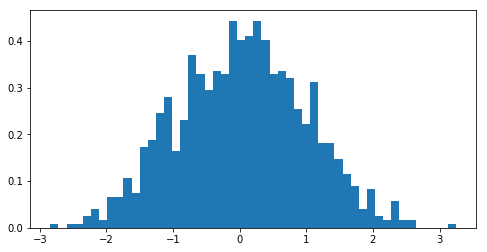

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import random

a = [random.gauss(0, 1) for i in range(0, 1000)]

plt.figure(figsize=(8, 4))
plt.hist(a, bins=50, normed=True, log=False, cumulative=False)
plt.show()

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'A1': [1, 2, 3, 4, 5]})

plt.figure()
df.plot.hist(bins=20)

plt.figure()
df_count = df.A1.value_counts(normalize=True, bins=10)
df_count.sort_index().plot(kind='bar', figsize=(6, 4))


In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'A1': [1, 2, 1, 3, 5, 6, 7, 4, 8, 9]})
# draw = pd.cut(df['A1'], bins=range(0, 10, 2))
draw = df['A1'].value_counts(normalize=True, bins=range(0, 10, 2))

plt.figure()
draw.sort_index().plot(kind='bar', figsize=(9, 4))


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'A1': [1, 2, 1, 3, 5, 6, 7, 4, 8, 9]})
df['A1'] = df['A1'].apply(lambda x: x/10)

draw = df['A1'].value_counts(normalize=True, bins=np.linspace(0, 1, 6))

plt.figure()
draw.sort_index().plot(kind='bar', figsize=(9, 4))


In [ ]:
%matplotlib inline

from pymongo import MongoClient
import matplotlib.pyplot as plt

def load_samples_from_db(collection, index=0):
    doc = collection.find_one({'index': index})
    samples = pd.read_json(doc['data'], orient='columns', convert_dates=True)
    samples.sort_index(inplace=True)
    return samples

fields = ['date', 'close', 'high_limit', 'pct', 'top_fractal_num', 'bot_fractal_num', 'top_fractal_trend',
          'bot_fractal_trend', 'last_top_fractal_pct', 'last_bot_fractal_pct', 'concave_num',
          'break_count_ratio', 'above_time_division_ratio', 'kline_volume_var', 'rise_kline_volume_var',
          'above_pre_close_ratio', 'y']

db_ip = '192.168.1.21'
db_port = 27017
db_sample_name = 'training'
col_sample_name = 'limitup'

col_sample = MongoClient(db_ip, db_port)[db_sample_name][col_sample_name]

samples = load_samples_from_db(col_sample)

draw = samples['pct'].value_counts(normalize=True, bins=20)
# draw = samples['concave_num'].value_counts(normalize=True)

plt.figure()
draw.sort_index().plot(kind='bar', figsize=(9, 4))

# samples.loc[samples['top_fractal_num'] > 2]

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')

f.subplots_adjust(hspace=0)

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, gridspec_kw = {'height_ratios':[3, 1, 1]})
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
f.subplots_adjust(hspace=0)

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# left, bottom, width, height
left, width = 0.1, 0.8
rect1 = [left, 0.1, width, 0.4]
rect2 = [left, 0.0, width, 0.1]

fig = plt.figure(facecolor='white')

ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2, sharex=ax1)
ax1.plot(x, y)
ax2.plot(x, y)
